<a href="https://colab.research.google.com/github/theQuert/ipyfun/blob/master/DIP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student ID: __110753204__\
Class: __資碩計一__\
Name: __李昱廷__

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NCCU/110_2/DIP/HW1

/content/drive/MyDrive/NCCU/110_2/DIP/HW1


In [ ]:
!pip install pillow

#### Q1. Create a program that combines two perfectly aligned pictures (laptop_left.png and laptop_right.png).

1. Using `numpy.hstack()` to concatenate pair of pixels from pictures (e.g. laptop_left and laptop_right)

In [ ]:
import numpy as np
import math
import cv2
from google.colab.patches import cv2_imshow
from PIL import *

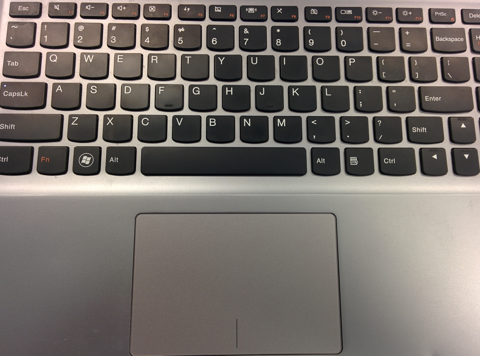

True

In [ ]:
img_left = cv2.imread('laptop_left.png')
img_right = cv2.imread('laptop_right.png')
concat_img = np.hstack((img_left, img_right))
cv2_imshow(concat_img)
cv2.imwrite('laptop.png', concat_img)

#### Following Q1, please rotate the combined image by 45 degrees clockwise (using an off-the-shelf function gets 10%, while implementing it by yourself gets the full credit)


1. Create a function for rotating photo
2. Calculate the rotation matrix 
3. Obtain the center coordinate of source image
4. Transform each coordinate of the image

In [ ]:
def rotate(angle):
    # image = np.array(Image.open(src_image))
    angle = math.radians(angle)
    cos = math.cos(angle)
    sin = math.sin(angle)
    h = image.shape[0]
    w = image.shape[1]
    new_h  = round(abs(h*cos) + abs(w*sin)) + 1
    new_w  = round(abs(w*cos) + abs(h*sin)) + 1

    output=np.zeros((new_h,new_w,image.shape[2]))
    original_centre_h = round(((h+1)/2)-1)
    original_centre_w = round(((w+1)/2)-1)
    new_centre_h = round(((new_h+1)/2)-1)
    new_centre_w = round(((new_w+1)/2)-1)

    for i in range(h):
        for j in range(w):
            y = h-1-i-original_centre_h
            x = w-1-j-original_centre_w
            new_y = round(-x*sin+y*cos)
            new_x = round(x*cos+y*sin)
            new_y = new_centre_h-new_y
            new_x = new_centre_w-new_x
            if 0 <= new_x < new_w and 0 <= new_y < new_h and new_x>=0 and new_y>=0:
                output[new_y,new_x,:] = image[i,j,:]
    pil_img = Image.fromarray((output).astype(np.uint8))
    pil_img.save("rotated_image.png")
    rotated_img = cv2.imread('rotated_image.png')
    cv2_imshow(rotated_img)

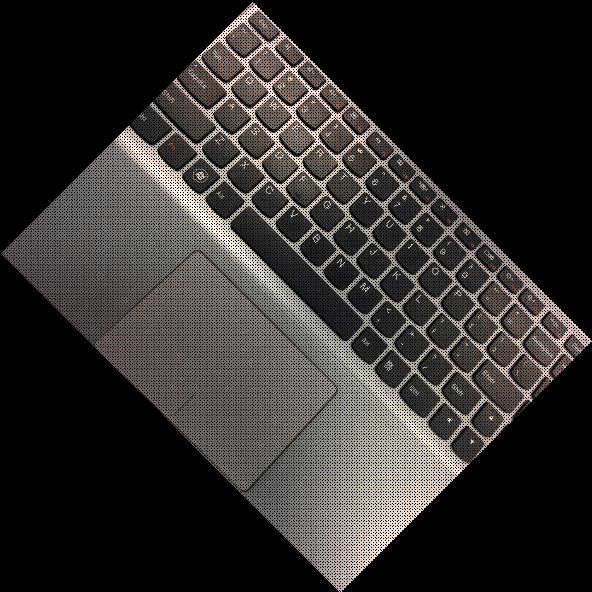

In [ ]:
image = np.array(Image.open("laptop.png"))
rotate(-45)

#### (20%) Implement a program (not using any off-the-shelf functions) to flip the upside- down image “lena_flipped.bmp” back.

1. Using the rotation function created before to rotate 180 degree

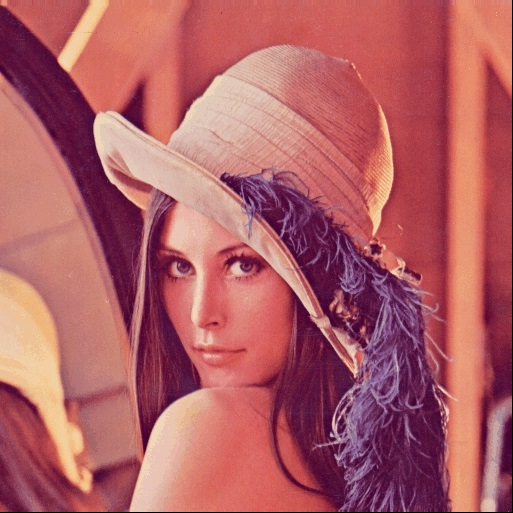

In [ ]:
image = np.array(Image.open("lena.bmp"))
rotate(180)

#### (25%) Please overlay the image “graveler.bmp” without the white background onto the flipped lena image.

In [ ]:
image = Image.open("graveler.bmp")

1. Convert image to RGBA format for manipulating pixels
2. check the bands of pixels
3. (255, 255, 255) means white, (255, 255, 255, 0) means transparent white.
4. if the pixel color==white, then convert it to white transparent (255, 255, 255, 0)
5. Overlay the trnsformed image to flipped lena image using paste() method

In [ ]:
image = image.convert('RGBA')
datas = image.getdata()
new_pix = []
for band in datas:
    if band[0]==band[1]==band[2]==255:
        new_pix.append((255, 255, 255, 0))
    else:
        new_pix.append(band)
image.putdata(new_data)
image.save('transparent_graveler.png', 'PNG')

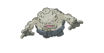

In [ ]:
lena_flipped = Image.open('rotated_image.png')
lena_flipped.paste(image, (100, 100), image)
lena_flipped.save('lena_conv.png', 'PNG')

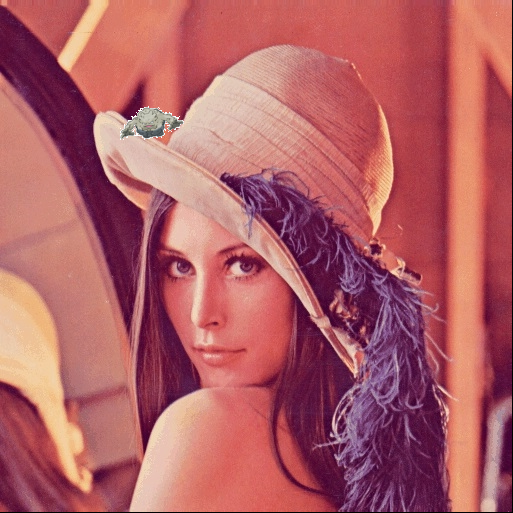

#### (25%, 25%)
(a) Please use a watermarking technique to embed “graveler.bmp” into the flipped lena image. You need to demonstrate how to embed and retrieve “graveler.bmp” from the image with the watermark.